In [61]:
import sys
sys.path.append("../prog")
import cauFirst

In [62]:
from FDTreeSet import *
from WFChain import *

In [63]:
import glob
doit = "all"
if doit == "all":
    filenames = ["../sample/MaterialsList_CrystalCandidates.yml",
                "../sample/MaterialsList_RegressionModel.yml",
                 "../sample/MaterialsList_SearchGoodMaterial.yml",
                 "../sample/MaterialsList_TrainingSet.yml",
                 "../sample/MaterialsList_aquisitionFunction.yml",
                 "../sample/Richer_DB.yml"
                ]
elif doit == "noDB":
    filenames = ["../sample/MaterialsList_CrystalCandidates.yml",
                "../sample/MaterialsList_RegressionModel.yml",
                 "../sample/MaterialsList_SearchGoodMaterial.yml",
                 "../sample/MaterialsList_TrainingSet.yml",
                 "../sample/MaterialsList_aquisitionFunction.yml"
                ]   
elif doit == "1":
    filenames = [
                 "../sample/Richer_DB.yml"
                ]

workflow: random generation
workflow: random generation
workflow: mateirals knowledge
workflow: mateirals knowledge Target variable
workflow: ../sample/MaterialsList_RegressionModel.yml#0
workflow: ../sample/MaterialsList_RegressionModel.yml#1
workflow: ../sample/MaterialsList_RegressionModel.yml#2
workflow: ../sample/MaterialsList_SearchGoodMaterial.yml#0
workflow: ../sample/MaterialsList_SearchGoodMaterial.yml#1
workflow: ../sample/MaterialsList_SearchGoodMaterial.yml#2
workflow: ../sample/MaterialsList_TrainingSet.yml#0
workflow: ../sample/MaterialsList_TrainingSet.yml#1
workflow: ../sample/MaterialsList_TrainingSet.yml#2
workflow: ../sample/MaterialsList_TrainingSet.yml#3
workflow: ../sample/MaterialsList_aquisitionFunction.yml#0
workflow: ../sample/MaterialsList_aquisitionFunction.yml#1
workflow: richerdb
workflow: newcoordinate
png is made.


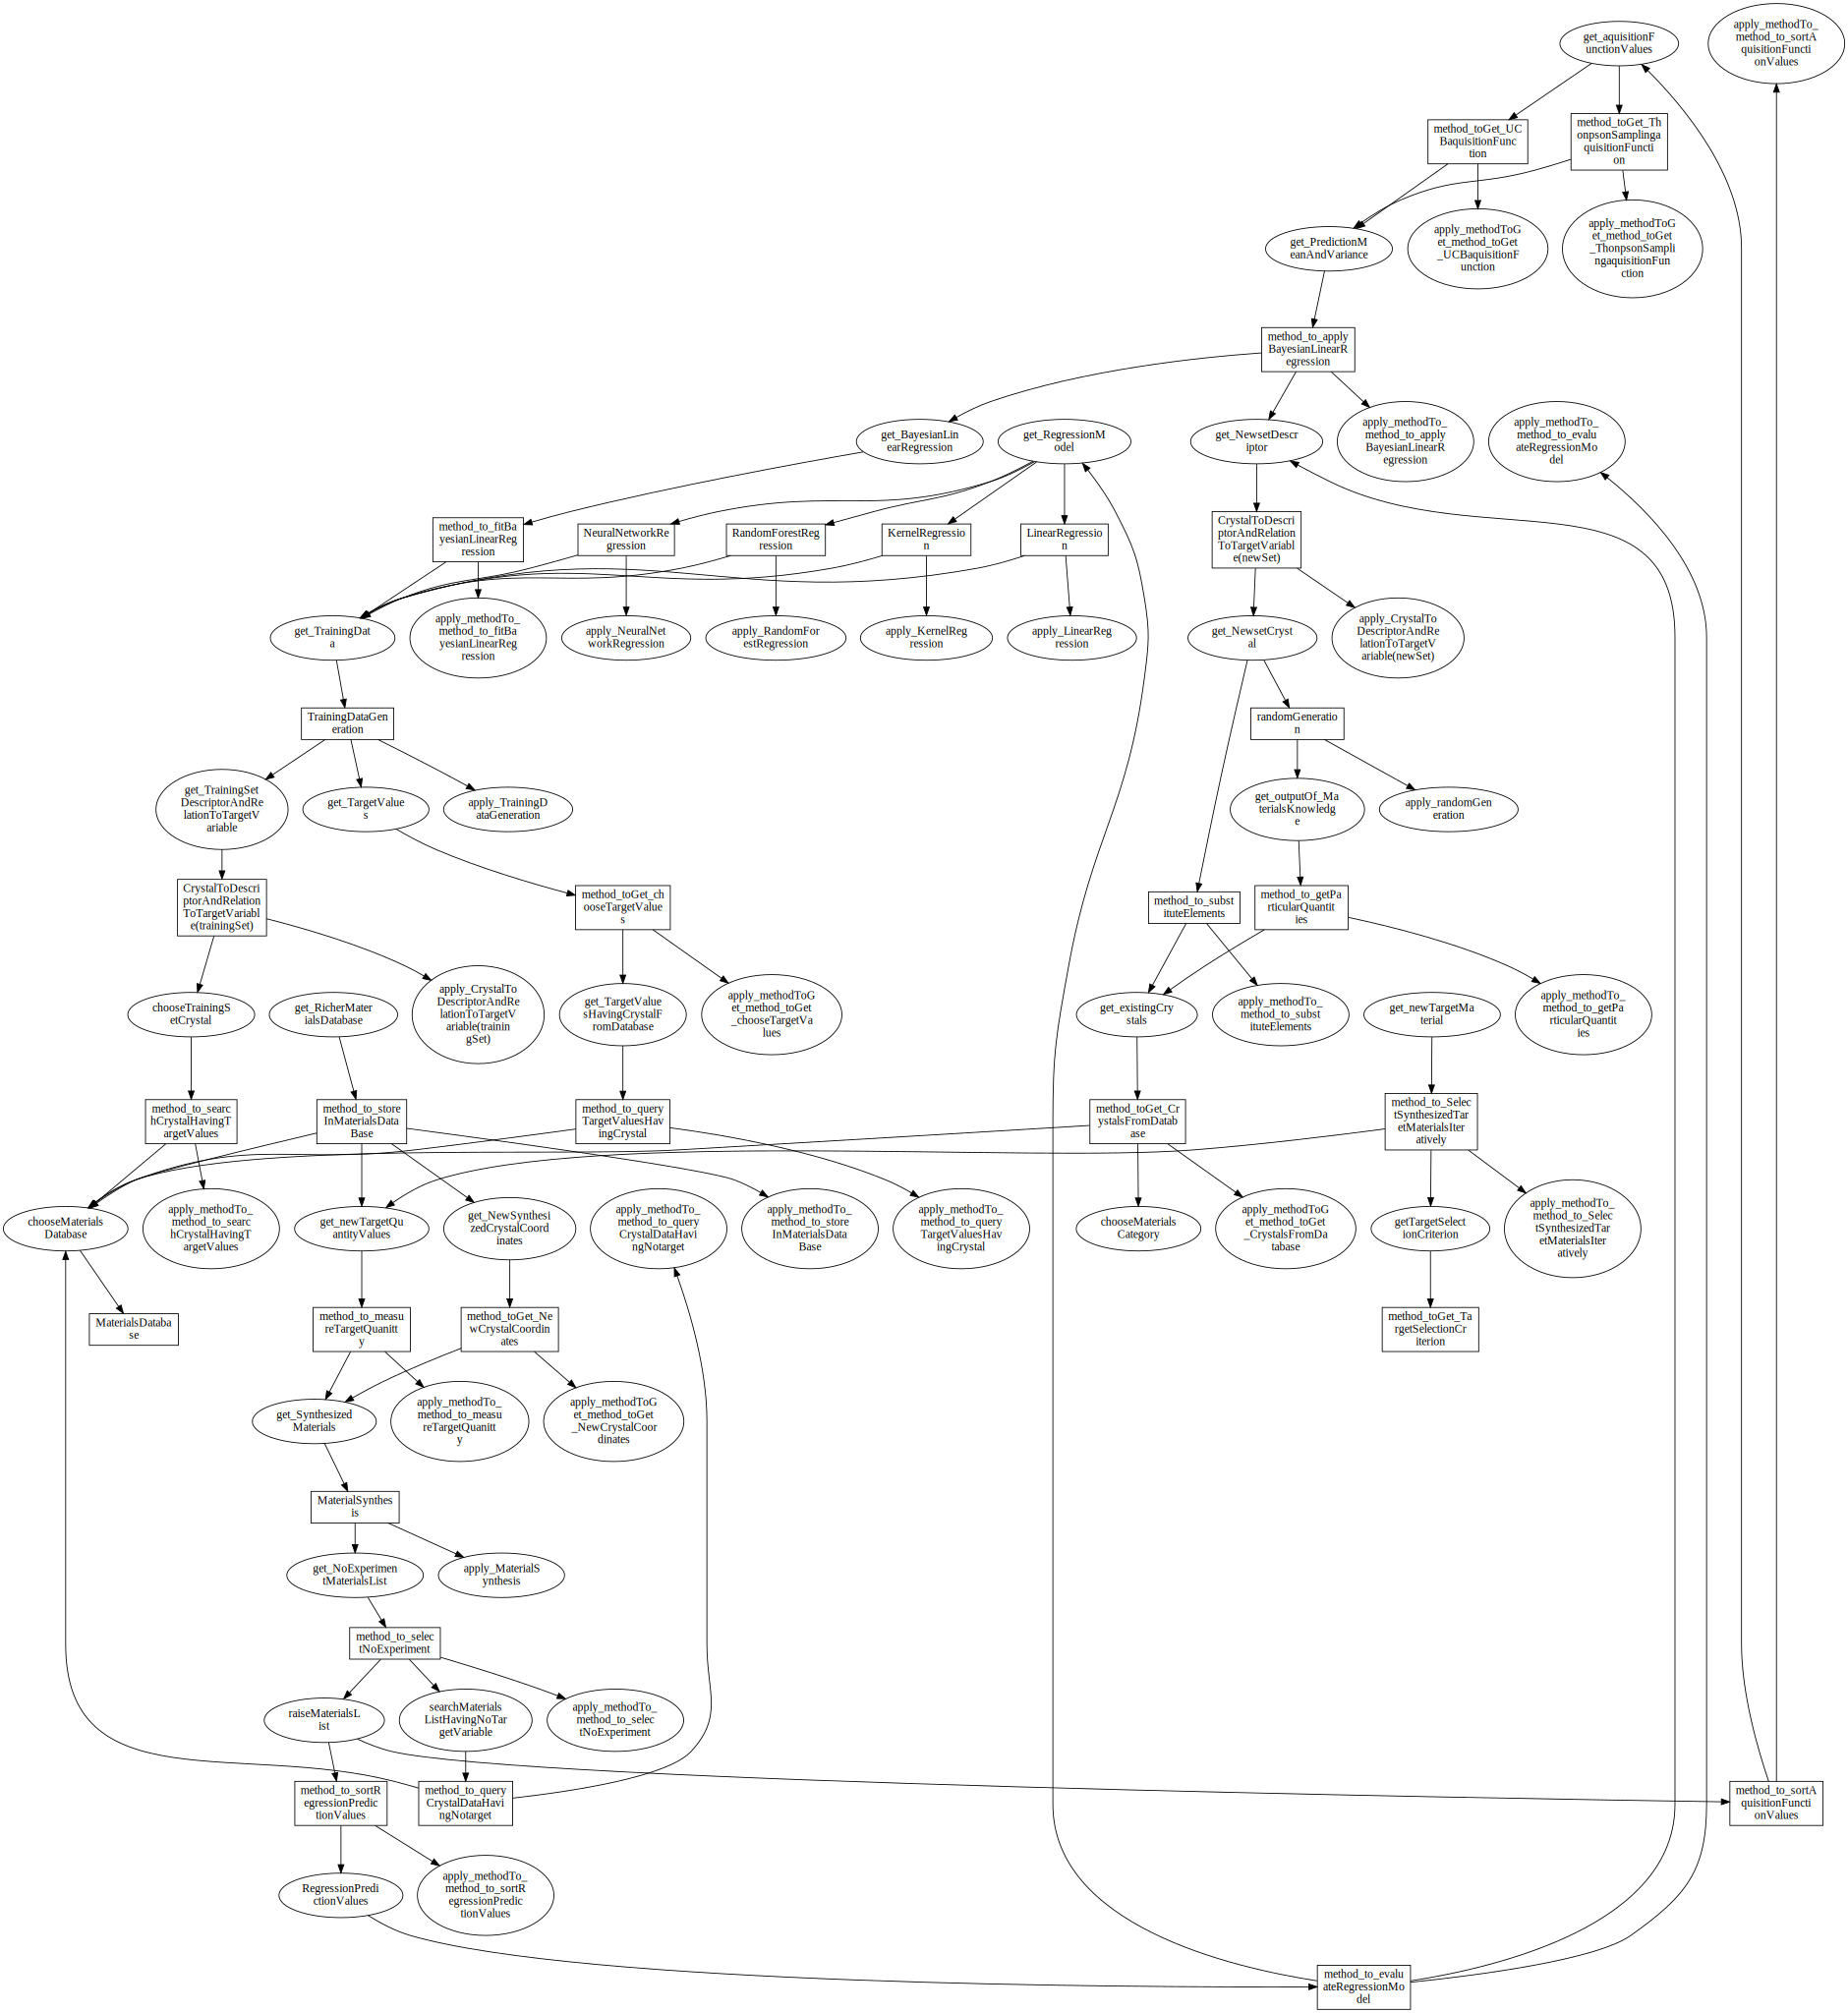

In [64]:
fdtset = FDTreeSet()

fdtset.load_files(filenames)

fdtset.print_names()

fdtree = cauFirst.FDTree()

fdtree.apply(fdtset.export_dic())

In [65]:
fdtset.wfblockall

[{'blockname': 'random generation',
  'order': 'workflow',
  'list': [{'group': [{'outputname': 'MaterialsKnowledge',
      'outputtype': 'method'}]},
   {'group': [{'methodname': 'randomGeneration',
      'methodtype': 'method',
      'outputname': 'NewsetCrystal',
      'outputtype': 'parts'}]}],
  'filename': '../sample/MaterialsList_CrystalCandidates.yml'},
 {'blockname': 'random generation',
  'order': 'workflow',
  'list': [{'group': [{'outputname': 'existingCrystals',
      'outputtype': 'parts'}]},
   {'group': [{'methodname': 'substituteElements',
      'methodtype': 'function',
      'outputname': 'NewsetCrystal',
      'outputtype': 'parts'}]}],
  'filename': '../sample/MaterialsList_CrystalCandidates.yml'},
 {'blockname': 'mateirals knowledge',
  'order': 'workflow',
  'list': [{'group': [{'methodname': 'MaterialsDatabase',
      'methodtype': 'method',
      'outputname': 'chooseMaterialsDatabase',
      'outputtype': 'function'}]},
   {'group': [{'methodname': 'CrystalsFr

In [66]:
wfchain = wfblockToWFChaim(fdtset.wfblockall)
wf = wfchain.to_WF()
print(yaml.dump(wf))

workflow:
  format: v2.3
  block:
  - blockname: MaterialsKnowledge-randomGeneration-NewsetCrystal
    order: workflow
    list:
    - group:
      - outputname: MaterialsKnowledge
        outputtype: method
    - group:
      - methodname: randomGeneration
        methodtype: method
        outputname: NewsetCrystal
        outputtype: parts
  - blockname: existingCrystals-substituteElements-NewsetCrystal
    order: workflow
    list:
    - group:
      - outputname: existingCrystals
        outputtype: parts
    - group:
      - methodname: substituteElements
        methodtype: function
        outputname: NewsetCrystal
        outputtype: parts
  - blockname: chooseMaterialsDatabase-CrystalsFromDatabase-existingCrystals
    order: workflow
    list:
    - group:
      - methodname: MaterialsDatabase
        methodtype: method
        outputname: chooseMaterialsDatabase
        outputtype: function
    - group:
      - methodname: CrystalsFromDatabase
        methodtype: parts
     

In [67]:
fdtree = cauFirst.FDTree(basename="all")
fdtree.apply(wf)

import shutil
filename = "all.gv.png"
shutil.copyfile(filename,"/media/sf_local_pc/{}".format(filename))


png is made.


'/media/sf_local_pc/all.gv.png'

In [68]:
raise

RuntimeError: No active exception to reraise

In [ ]:
trainchain = wfchain.search_link("TrainingData","raiseMaterialsList")

In [ ]:
newchain = wfchain.search_link("NewsetCrystal","raiseMaterialsList")

In [ ]:
trainchain.extend(newchain)

In [ ]:
wfsub = trainchain.to_WF()

In [ ]:
fdtree = cauFirst.FDTree(basename="new")
fdtree.apply(wfsub)
import shutil
filename = "new.gv.png"
shutil.copyfile(filename,"/media/sf_local_pc/{}".format(filename))